# Importanto Librerias

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

# Creado el set de datos

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2, 
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles

In [3]:
X.shape

(1000, 2)

In [4]:
Y.shape

(1000,)

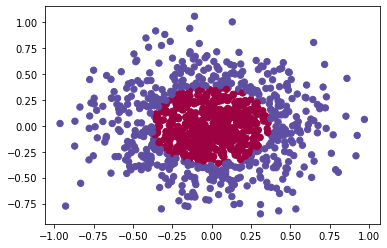

In [5]:
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

# Función de inicialización de parámetros

In [6]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)         
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1  
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [7]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [8]:
x = np.linspace(10,-10,100)

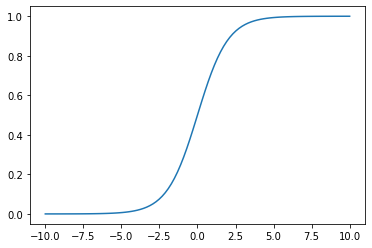

In [9]:
plt.plot(x,sigmoid(x))

# Función de pérdida

In [10]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [11]:
a = np.array([[2,3],
              [2,3],
              [2,3]])

In [12]:
a.shape

(3, 2)

In [13]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [14]:
b.shape

(2, 4)

In [15]:
np.matmul(a,b)

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

In [16]:
a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

# Función de Entrenamiento

In [17]:
def train(X_data,lr,params,training=True):
    
## Forward

    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
    # Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

# Entrenando la Red

In [18]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))
        

0.2724631187094834
0.23871995901779303
0.228954952454756
0.21998864327753875
0.21033081566789688
0.20001008252419292
0.18951322153310957
0.18001350600474242
0.17279853523879657
0.16792529985259924
0.16477004561981437
0.16255710061560275
0.16092835627558236
0.1598876898039473
0.1590216490422234
0.15848644686734423
0.1581551540791754
0.15793067200239314
0.15780290126004307
0.15771602854944883
0.1576758054507127
0.15766093509396548
0.15764854878262277
0.1576369510559419
0.15762668921564738
0.15758821272352155
0.15756486034254139
0.1575473742041503
0.15753078485602184
0.15751631235552713
0.15750235493689066
0.15748766457721816
0.15747409887345037
0.15746039947560436
0.15744676584313402
0.1574330718435834
0.15741372219662703
0.15740050596730754
0.15738812239224842
0.15737814035545378
0.15736812275284628
0.15735690915962172
0.15733451754336902
0.15730351713803373
0.1572791481642419
0.15725478792494985
0.15723600390855752
0.15721351163450792
0.15716103353019736
0.1571172606386205
0.1570835159

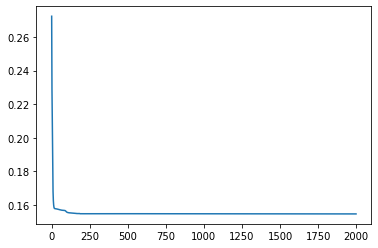

In [19]:
plt.plot(errors)

# Probando los nuevos datos

In [20]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [21]:
y = np.where(y >= 0.5, 1, 0)

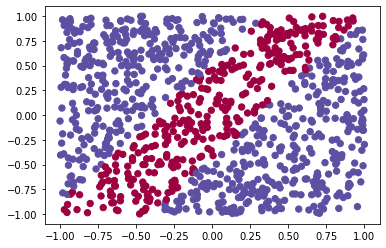

In [22]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

# Malla de Visualización

In [23]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [24]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

<ipython-input-25-2491cc3b5bec>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')


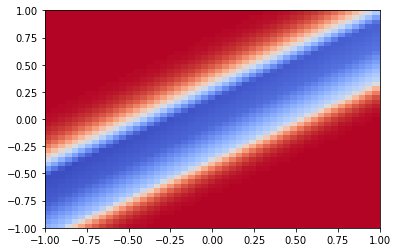

In [25]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')